In [2]:
Pkg.add("MAT")

INFO: Cloning cache of Blosc from git://github.com/stevengj/Blosc.jl.git
INFO: Cloning cache of HDF5 from git://github.com/JuliaLang/HDF5.jl.git
INFO: Cloning cache of MAT from git://github.com/simonster/MAT.jl.git
INFO: Cloning cache of Zlib from git://github.com/dcjones/Zlib.jl.git
INFO: Installing Blosc v0.1.4
INFO: Installing HDF5 v0.5.6
INFO: Installing MAT v0.2.12
INFO: Installing Zlib v0.1.10
INFO: Building Blosc
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 63208  100 63208    0     0  47876      0  0:00:01  0:00:01 --:--:--  114k
INFO: Building Homebrew


HEAD is now at 41132af version: parse opam archives
HEAD is now at b359d09 gnome-icon-theme needs to be mirrored by us to avoid pkg-config problems


INFO: Building HDF5
INFO: Package database updated
INFO: METADATA is out-of-date — you may not have the latest version of MAT
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [3]:
using MAT

In [46]:
using PyPlot

In [9]:
wiki_auth_file = matopen("data/WikiAdjSmall.mat")
varnames = names(wiki_auth_file)
A = read(wiki_auth_file, "A") # note that this does NOT introduce a variable ``varname`` into scope
close(wiki_auth_file)

In [10]:
A

1000x1000 sparse matrix with 1954 Float64 entries:
	[576 ,    1]  =  1.0
	[848 ,    1]  =  1.0
	[973 ,    1]  =  1.0
	[330 ,    4]  =  1.0
	[363 ,    4]  =  1.0
	[394 ,    4]  =  1.0
	[441 ,    4]  =  1.0
	[564 ,    4]  =  1.0
	[568 ,    4]  =  1.0
	[601 ,    4]  =  1.0
	⋮
	[848 ,  990]  =  1.0
	[879 ,  990]  =  1.0
	[986 ,  990]  =  1.0
	[714 ,  991]  =  1.0
	[151 ,  994]  =  1.0
	[249 ,  994]  =  1.0
	[252 ,  994]  =  1.0
	[310 ,  994]  =  1.0
	[580 ,  994]  =  1.0
	[249 ,  996]  =  1.0
	[704 ,  996]  =  1.0

In [20]:
A^2

1000x1000 sparse matrix with 9032 Float64 entries:
	[1   ,    1]  =  1.0
	[26  ,    1]  =  1.0
	[74  ,    1]  =  1.0
	[91  ,    1]  =  1.0
	[95  ,    1]  =  1.0
	[122 ,    1]  =  1.0
	[142 ,    1]  =  1.0
	[151 ,    1]  =  2.0
	[161 ,    1]  =  1.0
	[236 ,    1]  =  1.0
	⋮
	[417 ,  994]  =  2.0
	[454 ,  994]  =  1.0
	[462 ,  994]  =  1.0
	[576 ,  994]  =  1.0
	[633 ,  994]  =  1.0
	[731 ,  994]  =  1.0
	[767 ,  994]  =  1.0
	[824 ,  994]  =  1.0
	[848 ,  994]  =  1.0
	[901 ,  994]  =  1.0
	[928 ,  994]  =  1.0

In [72]:
a = zeros(10)

10-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [75]:
a[1] = 5

5

In [76]:
a

10-element Array{Float64,1}:
 5.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [78]:
a[1] = 6

6

In [79]:
a

10-element Array{Float64,1}:
 6.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [45]:
row_len = size(A)[1]
col_len = size(A)[2]

histo = zeros(row_len)

for k = 1:20
    adj_k_steps = A^k
    count = 0
    for row_index = 1:row_len
        for col_index = 1:col_len
            val = adj_k_steps[row_index, col_index]
            
            if val > 0
                count += 1
            end
        end
    end
    
    histo[k] = count
end

histo

1000-element Array{Float64,1}:
  1954.0
  9032.0
 25733.0
 45648.0
 60582.0
 68480.0
 71799.0
 73344.0
 73953.0
 74192.0
 74241.0
 74251.0
 74254.0
     ⋮  
     0.0
     0.0
     0.0
     0.0
     0.0
     0.0
     0.0
     0.0
     0.0
     0.0
     0.0
     0.0

In [85]:
histo[1:20]

20-element Array{Float64,1}:
  1954.0
  9032.0
 25733.0
 45648.0
 60582.0
 68480.0
 71799.0
 73344.0
 73953.0
 74192.0
 74241.0
 74251.0
 74254.0
 74254.0
 74254.0
 74254.0
 74254.0
 74254.0
 74254.0
 74254.0

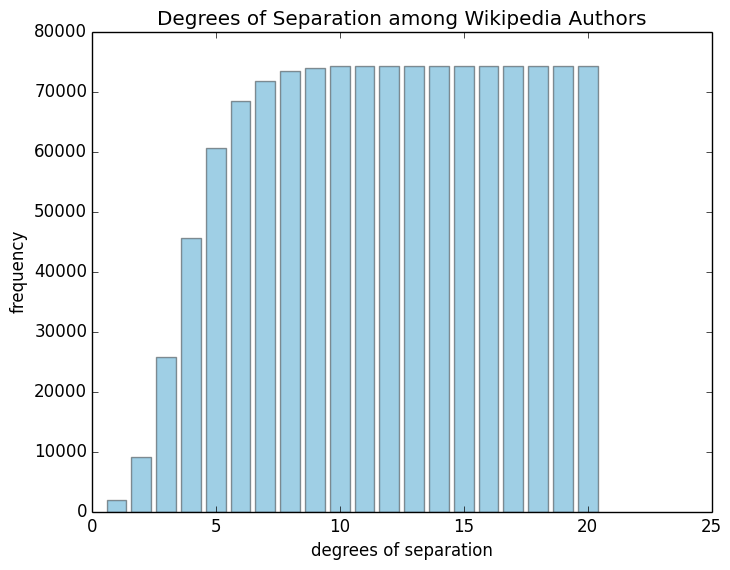

PyObject <matplotlib.text.Text object at 0x120ed5210>

In [87]:
# Should the X-axis be 1,2,...,20?
b = bar([1:20],histo[1:20],color="#0f87bf",align="center",alpha=0.4)
# h = PyPlot.plt[:hist](histo, 20)
xlabel("degrees of separation")
ylabel("frequency")
title("Degrees of Separation among Wikipedia Authors")